In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import plot_importance

In [2]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
#df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


## Pre-processing

In [4]:
TARGET_VARIABLE = "Diabetes_binary"
#TARGET_VARIABLE = "Diabetes_012"
X = df.drop(TARGET_VARIABLE, axis = 1)
y = df[TARGET_VARIABLE]

## Model

In [43]:
#model = LogisticRegression(multi_class = "multinomial", max_iter = 500)
#model = KNeighborsClassifier(n_neighbors = 10)
#model = SVC()

In [12]:
model = xgboost.XGBClassifier(max_depth = 3, learning_rate = 0.4, n_estimators = 600, objective = "binary:logistic")

In [6]:
import statsmodels.api as sd
sd_model = sd.Logit(y, sd.add_constant(X)).fit(disp = 0)
print(sd_model.pvalues)
sd_model.summary()

const                    0.000000e+00
HighBP                  8.834547e-304
HighChol                7.121084e-213
CholCheck                7.316015e-63
BMI                      0.000000e+00
Smoker                   9.290749e-01
Stroke                   7.496383e-05
HeartDiseaseorAttack     6.323628e-19
PhysActivity             1.197257e-01
Fruits                   7.818480e-02
Veggies                  8.883898e-03
HvyAlcoholConsump        2.414335e-53
AnyHealthcare            1.972641e-01
NoDocbcCost              5.774518e-01
GenHlth                  0.000000e+00
MentHlth                 6.884790e-04
PhysHlth                 2.937376e-12
DiffWalk                 8.809206e-06
Sex                      2.896713e-44
Age                      0.000000e+00
Education                3.159242e-04
Income                   9.854705e-30
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70670
Method:                           MLE   Df Model:                           21
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.2613
Time:                        11:03:19   Log-Likelihood:                -36194.
converged:                       True   LL-Null:                       -49000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.8651      0.124    -55.151      0.000      -7.109      -6.621
HighBP                   0.7353      0.020     37.255      0.000       0.697       0.774
HighChol                 0.5873      0.019     31.139      0.000       0.550       0.624
CholCheck                1.3608      0.081     16.735      0.000       1.201       1.520
BMI                      0.0756      0.002     48.057      0.000       0.073       0.079
Smoker                  -0.0017      0.019     -0.089      0.929      -0.039       0.035
Stroke                   0.1620      0.041      3.960      0.000       0.082       0.242
HeartDiseaseorAttack     0.2527      0.028      8.886      0.000       0.197       0.308
PhysActivity            -0.0331      0.021     -1.556      0.120      -0.075       0.009
Fruits                  -0.0345      0.020     -1.761      0.078      -0.073       0.004
Veggies                 -0.0611      0.023     -2.616      0.009      -0.107      -0.015
HvyAlcoholConsump       -0.7497      0.049    -15.375      0.000      -0.845      -0.654
AnyHealthcare            0.0608      0.047      1.289      0.197      -0.032       0.153
NoDocbcCost              0.0190      0.034      0.557      0.577      -0.048       0.086
GenHlth                  0.5846      0.011     51.071      0.000       0.562       0.607
MentHlth                -0.0044      0.001     -3.394      0.001      -0.007      -0.002
PhysHlth                -0.0083      0.001     -6.981      0.000      -0.011      -0.006
DiffWalk                 0.1149      0.026      4.445      0.000       0.064       0.166
Sex                      0.2673      0.019     13.956      0.000       0.230       0.305
Age                      0.1522      0.004     38.950      0.000       0.145       0.160
Education               -0.0368      0.010     -3.602      0.000      -0.057      -0.017
Income                  -0.0588      0.005    -11.325      0.000      -0.069      -0.049
========================================================================================
"""

In [8]:
model = xgboost.XGBClassifier()
model.fit(X, y)

# Get cross-validated scores
y_scores = cross_val_predict(model, X, y, cv=3, method="predict_proba")[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_scores)

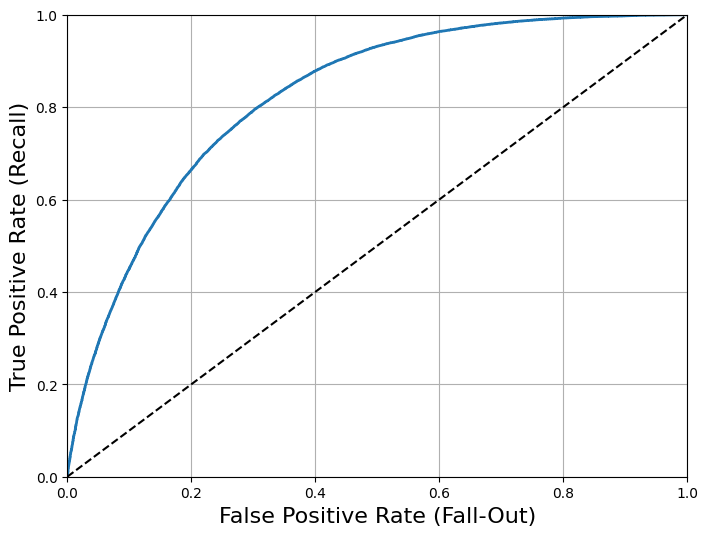

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is the name of your model
# y_scores = cross_val_predict(model, X, y, cv=3, method="decision_function")
# fpr, tpr, thresholds = roc_curve(y, y_scores)

# Function to plot the ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# # Assuming 'recall_90_precision' is defined somewhere
# fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
# plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
# plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
# plt.plot([fpr_90], [recall_90_precision], "ro")
# # Assuming 'save_fig' is defined somewhere
# save_fig("roc_curve_plot")
# plt.show()


In [10]:
from catboost import CatBoostClassifier, Pool
train_pool = Pool(data=X, label=y)


# Create a CatBoostClassifier with custom recall metric and ALR
custom_recall_metric = ['Recall']
model = CatBoostClassifier(
    learning_rate = 0.301,
    iterations= 250,
    custom_metric=custom_recall_metric, 
    random_seed=42
)

# Train the model with Pool objects
model.fit(train_pool,  use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6005971	total: 154ms	remaining: 38.3s
1:	learn: 0.5590544	total: 179ms	remaining: 22.2s
2:	learn: 0.5385971	total: 190ms	remaining: 15.6s
3:	learn: 0.5260322	total: 200ms	remaining: 12.3s
4:	learn: 0.5182705	total: 210ms	remaining: 10.3s
5:	learn: 0.5131578	total: 220ms	remaining: 8.94s
6:	learn: 0.5094697	total: 231ms	remaining: 8.02s
7:	learn: 0.5066092	total: 242ms	remaining: 7.32s
8:	learn: 0.5047341	total: 253ms	remaining: 6.78s
9:	learn: 0.5034541	total: 265ms	remaining: 6.37s
10:	learn: 0.5024596	total: 278ms	remaining: 6.03s
11:	learn: 0.5017900	total: 288ms	remaining: 5.71s
12:	learn: 0.5010783	total: 298ms	remaining: 5.44s
13:	learn: 0.5004373	total: 308ms	remaining: 5.19s
14:	learn: 0.4998835	total: 318ms	remaining: 4.97s
15:	learn: 0.4994734	total: 327ms	remaining: 4.78s
16:	learn: 0.4990157	total: 336ms	remaining: 4.61s
17:	learn: 0.4983943	total: 346ms	remaining: 4.45s
18:	learn: 0.4979746	total: 355ms	remaining: 4.31s
19:	learn: 0.4976272	total: 364ms	remaini

## Feature selection

## Cross-validation

In [13]:
cross_val_score(model, X, y, cv = 5, scoring = "roc_auc")
#cross_val_score(model, X, y, cv = 5, scoring = "roc_auc_ovo")

array([0.81798878, 0.82531503, 0.82277364, 0.83048216, 0.82842059])

In [45]:
param_grid = {
    "n_neighbors": range(15, 25, 2)
}
grisearch = GridSearchCV(model, param_grid, cv = 5, scoring = "roc_auc", verbose = 3)

In [47]:
grisearch.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....................n_neighbors=15;, score=0.776 total time=   0.8s
[CV 2/5] END ....................n_neighbors=15;, score=0.784 total time=   0.8s
[CV 3/5] END ....................n_neighbors=15;, score=0.787 total time=   0.7s
[CV 4/5] END ....................n_neighbors=15;, score=0.794 total time=   0.8s
[CV 5/5] END ....................n_neighbors=15;, score=0.795 total time=   0.8s
[CV 1/5] END ....................n_neighbors=17;, score=0.780 total time=   0.7s
[CV 2/5] END ....................n_neighbors=17;, score=0.787 total time=   0.8s
[CV 3/5] END ....................n_neighbors=17;, score=0.790 total time=   0.8s
[CV 4/5] END ....................n_neighbors=17;, score=0.796 total time=   0.8s
[CV 5/5] END ....................n_neighbors=17;, score=0.796 total time=   0.7s
[CV 1/5] END ....................n_neighbors=19;, score=0.780 total time=   0.8s
[CV 2/5] END ....................n_neighbors=19;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': range(15, 25, 2)}, scoring='roc_auc',
             verbose=3)

In [18]:
param_grid = {
    "learning_rate": [.2, .4, .6],
    "max_depth": range(2, 4),
}
grisearch = GridSearchCV(model, param_grid, cv = 5, scoring = "roc_auc", verbose = 3)

In [19]:
grisearch.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....learning_rate=0.2, max_depth=2;, score=0.820 total time=   0.4s
[CV 2/5] END ....learning_rate=0.2, max_depth=2;, score=0.830 total time=   0.4s
[CV 3/5] END ....learning_rate=0.2, max_depth=2;, score=0.829 total time=   0.3s
[CV 4/5] END ....learning_rate=0.2, max_depth=2;, score=0.835 total time=   0.3s
[CV 5/5] END ....learning_rate=0.2, max_depth=2;, score=0.835 total time=   0.3s
[CV 1/5] END ....learning_rate=0.2, max_depth=3;, score=0.821 total time=   0.4s
[CV 2/5] END ....learning_rate=0.2, max_depth=3;, score=0.829 total time=   0.4s
[CV 3/5] END ....learning_rate=0.2, max_depth=3;, score=0.829 total time=   0.4s
[CV 4/5] END ....learning_rate=0.2, max_depth=3;, score=0.836 total time=   0.4s
[CV 5/5] END ....learning_rate=0.2, max_depth=3;, score=0.835 total time=   0.4s
[CV 1/5] END ....learning_rate=0.4, max_depth=2;, score=0.820 total time=   0.3s
[CV 2/5] END ....learning_rate=0.4, max_depth=2;,

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'max_depth': range(2, 4)},
             scoring='roc_auc', verbose=3)

In [65]:
X.iloc[70689]

HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     25.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     1.0
PhysActivity             0.0
Fruits                   1.0
Veggies                  0.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  5.0
MentHlth                15.0
PhysHlth                 0.0
DiffWalk                 1.0
Sex                      0.0
Age                     13.0
Education                6.0
Income                   4.0
Name: 70689, dtype: float64

In [58]:
grisearch

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.4, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=600, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'max_depth': range(2, 6)},
             scoring='roc_auc', verbose=3)

In [64]:
grisearch.best_estimator_.predict_proba(X)

array([[0.8189609 , 0.18103912],
       [0.2818985 , 0.7181015 ],
       [0.8262752 , 0.17372479],
       ...,
       [0.15936953, 0.8406305 ],
       [0.27586716, 0.72413284],
       [0.4304639 , 0.5695361 ]], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

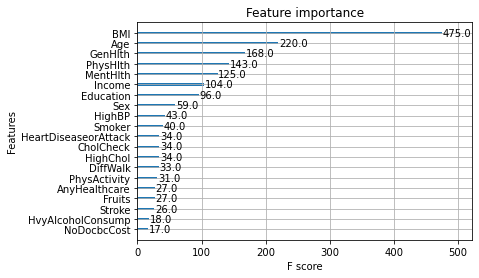

In [20]:
plot_importance(gridsearch.best_estimator_, max_num_features = 20)

In [25]:
grisearch

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.4, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=600, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'max_depth': range(2, 6)},
             scoring='roc_auc', verbose=3)